In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import Figure
import QPTF as qp

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
sns.set_context("notebook")
sns.set_palette("pastel")

Good!


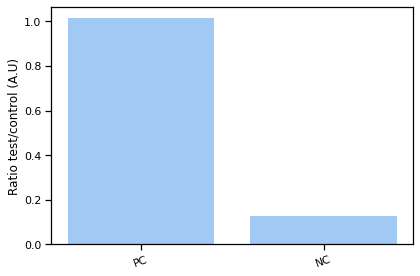

In [18]:
qp.quantif("../results/paper_test/results.csv",['PC','NC'])

Good!


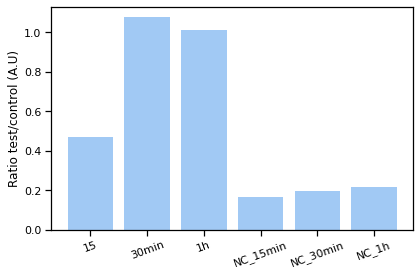

In [19]:
qp.quantif("../results/paper_test/resultspt_2.csv",['15','30min','1h','NC_15min','NC_30min','NC_1h'])

### 1nm target, 100µM probes, 25 °C, 1h incub

Good!


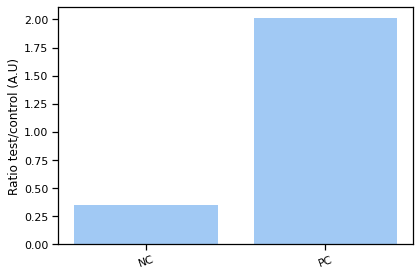

In [20]:
qp.quantif("../results/paper_test/Results_pt3.csv",['NC','PC'])

### Salinity

Good!


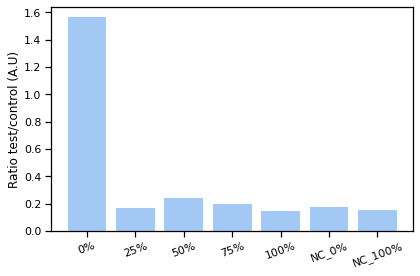

In [21]:
qp.quantif("../results/paper_test/salinity.csv",['0%','25%',"50%",'75%','100%','NC_0%','NC_100%'])

### Chemical salinity test (NaCl)

Good!


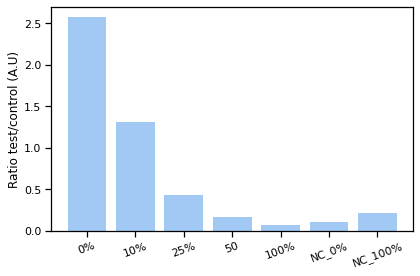

In [22]:
qp.quantif("../results/paper_test/salinity_chemical.csv",['0%',"10%",'25%','50','100%','NC_0%','NC_100%'])

### Salinity of Thau water (lower percentage)

Good!


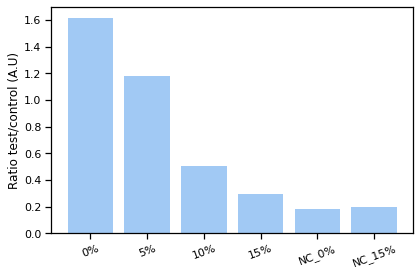

In [23]:
qp.quantif("../results/paper_test/salinity_thau_lower.csv",['0%','5%',"10%",'15%','NC_0%','NC_15%'])

### New targets test 

Good!


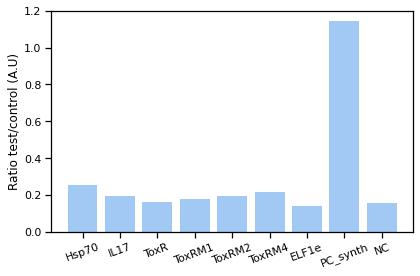

In [24]:
qp.quantif("../results/paper_test/all_seq.csv",['Hsp70','IL17','ToxR','ToxRM1','ToxRM2','ToxRM4','ELF1e','PC_synth','NC'])

### All targets v3...

Good!


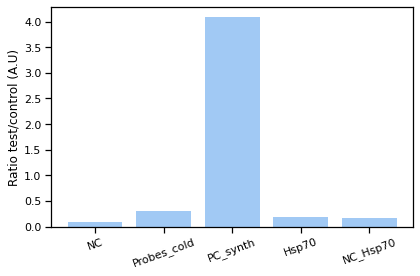

In [25]:
qp.quantif("../results/paper_test/all_seq_2.csv",['NC','Probes_cold','PC_synth','Hsp70','NC_Hsp70'])